In [1]:
%autosave 0

Autosave disabled


In [12]:
import itertools
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j]/1.8 > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Verdadeiro')
    plt.xlabel('Valor Previsto')
    

In [4]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [5]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="bottom", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [6]:
xl = pd.ExcelFile('geologo.xlsx')
'''
print(xl.sheet_names) # Imprime as planilhas disponíveis no arquivo excel
print(type(xl)) # Imprime o tipo de arquivo
print(xl.sheet_names) # Imprime as planilhas
'''
df1 = xl.parse('prev'); # Recebe a planilha Dados ; não mostra o resultado

In [7]:
df1.columns

Index(['y_real', 'y_pred'], dtype='object')

In [8]:
y_real=df1.iloc[:,0]
y_pred=df1.iloc[:,1]

Confusion matrix, without normalization


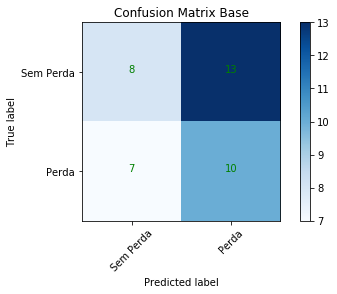

In [9]:
printcfm(y_real,y_pred,title='Confusion Matrix Base')

In [10]:
print(classification_report(y_real, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.38      0.44        21
          1       0.43      0.59      0.50        17

avg / total       0.49      0.47      0.47        38



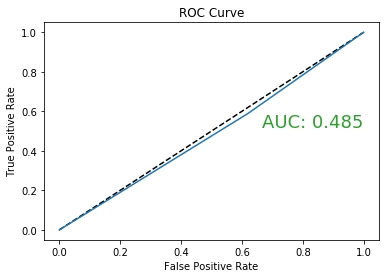

In [13]:
plotRoc(y_real, y_pred)